# 14 MatPlotLib - Pie Charts

Pie Charts - only use these in certain scenarios.

## 14.1 Simple examples

In [1]:
# Import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dat
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# data cleaning
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\erard\Anaconda3\envs\Luke_Barousse_Python_Course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's start by plotting one of the easier columns of hte dataset - Job_work_from_home. B/c it's a boolean expression.

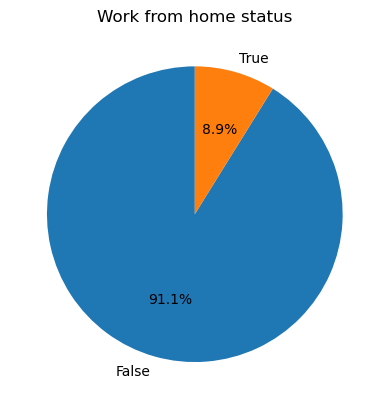

In [2]:
# get the counts of values in the job_work_from_home column and plot it right away

df["job_work_from_home"].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%")
plt.title("Work from home status")
plt.ylabel("")
plt.show()

# this is a good example of when to use a pie chart!

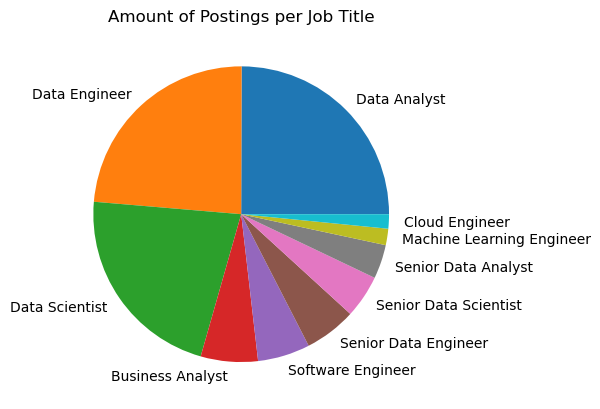

In [3]:
# let's try with job_title_short

df["job_title_short"].value_counts().plot(kind="pie")
plt.title("Amount of Postings per Job Title")
plt.ylabel("")
plt.show()

# this is a not so good example of when to use a pie chart! It's hard to compare across various categories - difficult to say which one is larger than the others. 

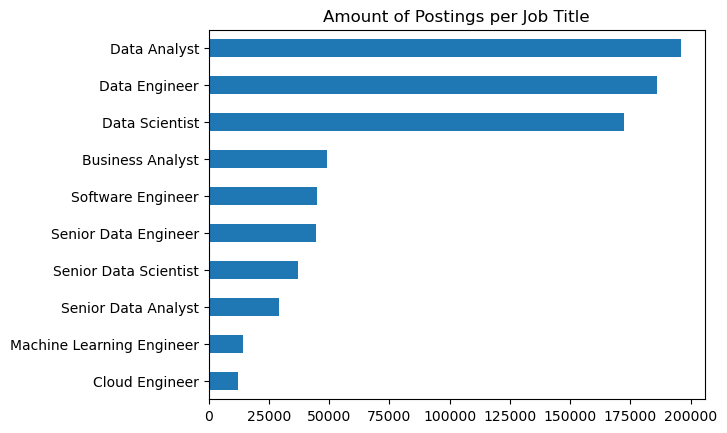

In [4]:
# this is a much better way to plot this kind of information

df["job_title_short"].value_counts().plot(kind="barh")
plt.title("Amount of Postings per Job Title")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.show()

## 14.2 Take it up a notch

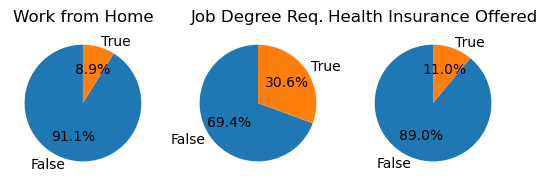

In [5]:
# we have 3 boolean columns in the df. let's plot them all into one subplot
# we will use the matplotlib notation for this example (rather than the pandas notation)

# df[["job_work_from_home", "job_no_degree_mention", "job_health_insurance"]]

fig, ax = plt.subplots(1, 3)


dict_column = { # creating a dict that contains all the columns we analyse as well as the title value to appear on the pie chart
    "job_work_from_home": "Work from Home",
    "job_no_degree_mention": "Job Degree Req.",
    "job_health_insurance": "Health Insurance Offered"

}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct="%1.1f%%", labels=["False", "True"])
    ax[i].set_title(title)

plt.show()

# 14 Problems

## 2.14.1

Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:

- Create a new DataFrame called df_DA that only gets Data Analyst roles.
- Then count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
- Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
- Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.

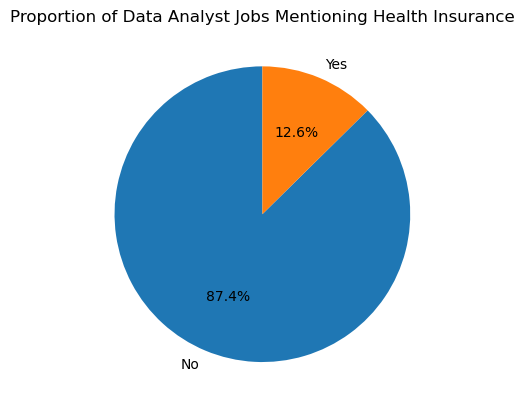

In [13]:
# copy df

df_problem1 = df.copy()

# new df with only Data Analyst roles

df_DA = df_problem1[df_problem1["job_title_short"] == "Data Analyst"]

# count jobs based on mention of health insurance

health_insurance_counts = df_DA["job_health_insurance"].value_counts()

# plot results

plt.pie(health_insurance_counts, labels=["No", "Yes"], autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Data Analyst Jobs Mentioning Health Insurance")
plt.show()

## 2.14.2

- Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
- Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
- Plot this using plt.pie(), setting labels parameter to the index, startangle to 90, and format values to display similarly to 23.1%.
- Add a title 'Job Schedule Full-time vs. Part-time'.

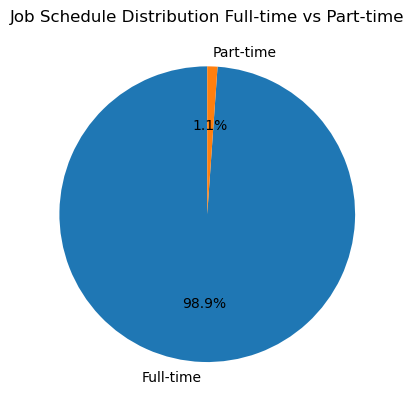

job_schedule_type
Full-time    701727
Part-time      7881
Name: count, dtype: int64

In [23]:
# copy df

df_problem2 = df.copy()

# create problem df

df_ft_pt = df_problem2[(df_problem2["job_schedule_type"] == "Full-time") | (df_problem2["job_schedule_type"] == "Part-time")]

# group data by job_schedule_type

jobs_by_schedule = df_ft_pt["job_schedule_type"].value_counts()

# plot
plt.pie(jobs_by_schedule, labels=jobs_by_schedule.index, autopct="%1.1f%%", startangle=90)
plt.title("Job Schedule Distribution Full-time vs Part-time")
plt.show()
jobs_by_schedule

# 2.14.3

- Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.
- Only get job postings located in the US, create a new DataFrame with this filtered data called df_US.
- Use the job_no_degree_mention column for this purpose.
- Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the explode parameter set to (0, 0.1) inside of plt.pie())
- Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

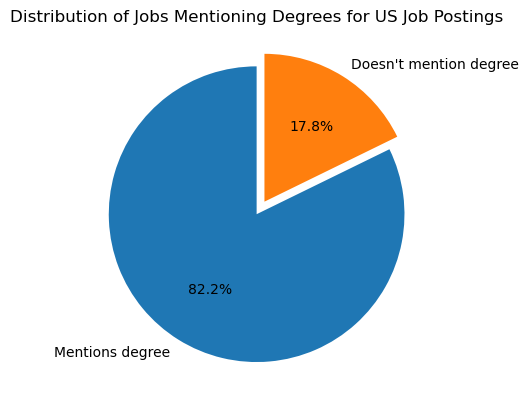

job_no_degree_mention
False    169655
True      36637
Name: count, dtype: int64

In [35]:
# copy df

df_problem3 = df.copy()

# jobs in the US that mention a degree

df_US = df_problem3[(df_problem3["job_country"] == "United States")]

# count jobs based on degree

jobs_US_degree = df_US["job_no_degree_mention"].value_counts()

# plot
plt.pie(jobs_US_degree, labels=["Mentions degree", "Doesn't mention degree"], autopct="%1.1f%%", startangle=90, explode=(0, 0.1))
plt.title("Distribution of Jobs Mentioning Degrees for US Job Postings")
plt.show()
jobs_US_degree
